In [20]:
# Analyze a single city -> New York

In [21]:
# Cleaning the data
%matplotlib inline
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
import nltk
import pandas as pd
import numpy as np
from collections import Counter
np.random.seed(42)
#import sys
#reload(sys)
#sys.setdefaultencoding('utf8')

In [22]:
inputDF = pd.read_csv('listings_copenhagen.csv')
inputDF=inputDF[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)


#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices


#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.reviews_per_month > 0]
inputDF = inputDF[inputDF.accommodates  > 0]

print inputDF.review_scores_rating.mean()

#Currency adaption
def currency_exchange(prices,conversion_factor):
    converted_prices = conversion_factor*prices
    return converted_prices


# Convert price to American Dollar
# USA factor= 1.00
# Sydney factor: 0.76
# Copenhagen factor: 0.16
price_values = inputDF.price.values
converted_prices = currency_exchange(price_values,conversion_factor=0.16)
inputDF['price'] = converted_prices

#new view of dataset
inputDF.head()



############################### Different city ##############################
listing_ny = pd.read_csv('listings_new_york.csv')
listing_ny=listing_ny[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]

# replacing NaN values with 0
listing_ny.fillna(0, inplace=True)


#Extracting prices from the table
price = listing_ny['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
listing_ny['price']=prices


#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
listing_ny = listing_ny[listing_ny.bathrooms >0]
listing_ny = listing_ny[listing_ny.bedrooms > 0]
listing_ny = listing_ny[listing_ny.beds > 0]
listing_ny = listing_ny[listing_ny.price  > 0]
listing_ny = listing_ny[listing_ny.review_scores_rating  > 0]
listing_ny = listing_ny[listing_ny.reviews_per_month > 0]
listing_ny = listing_ny[listing_ny.accommodates  > 0]

print listing_ny.review_scores_rating.mean()

#Currency adaption
def currency_exchange(prices,conversion_factor):
    converted_prices = conversion_factor*prices
    return converted_prices


# Convert price to American Dollar
# USA factor= 1.00
# Sydney factor: 0.76
# Copenhagen factor: 0.16
price_values = listing_ny.price.values
converted_prices = currency_exchange(price_values,conversion_factor=1.00)
listing_ny['price'] = converted_prices

#new view of dataset
listing_ny.head()


94.4112237828
93.5000324802


,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
1,20702398,Quiet house on City Island,1 private bedroom and bathroom available for o...,-73.786509,40.849191,0,1 private bedroom and bathroom available for o...,f,This neighborhood is dope! Lot's of seafood re...,City Island,...,Private room,2,1.0,1.0,1.0,2.00,"{""Wireless Internet"",""Air conditioning"",Kitche...",moderate,2,50.0
2,6627449,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,-73.786609,40.849775,"We are close to fishing, boating, biking, hors...",This ground floor apartment is light and airy ...,f,City Island is a unique and a hidden gem of Ne...,City Island,...,Entire home/apt,3,1.0,1.0,1.0,0.77,"{TV,Internet,""Wireless Internet"",""Air conditio...",strict,21,125.0
5,5557381,Quaint City Island Home,"Located in an old sea-shanty town, our home ha...",-73.789328,40.850024,You won't find a place so close to the city (N...,"Located in an old sea-shanty town, our home ha...",t,"City Island is unique in two ways. First, you ...",City Island,...,Private room,4,1.0,1.0,1.0,3.27,"{Internet,""Wireless Internet"",""Air conditionin...",moderate,94,69.0
6,19609887,Sweet Getaway,"Getaway for two (2) or up to seven (7), nice s...",-73.789304,40.851980,"$150 first two guests per night, $25 each add...","Getaway for two (2) or up to seven (7), nice s...",f,"If you enjoy seafood, City Island is the place...",City Island,...,Entire home/apt,7,1.0,2.0,5.0,1.58,"{TV,""Air conditioning"",Kitchen,""Free parking o...",flexible,3,150.0
7,7949480,City Island Sanctuary BR & Private Bath w Parking,Relax on City Island in our quiet guest room w...,-73.788680,40.852054,"On parle français et anglais, (lire le françai...",Relax on City Island in our quiet guest room w...,f,City Island is a unique sanctuary in New York ...,City Island,...,Private room,2,1.0,1.0,1.0,1.49,"{""Cable TV"",""Wireless Internet"",""Air condition...",moderate,31,101.0


In [23]:
print len(listing_ny)
print len(inputDF)

30788
15877


In [24]:
def bin_rating(rating):
    if rating<=20:
        return 1
    elif rating<=40:
        return 2
    elif rating<=40:
        return 2
    elif rating<=60:
        return 3
    elif rating<=80:
        return 4
    else:
        return 5

In [25]:
new_ratings = inputDF.review_scores_rating.apply(bin_rating)
#Replace the rating column with the new column
inputDF.review_scores_rating=new_ratings

#################### NEW CITY #####################  

new_ratings = listing_ny.review_scores_rating.apply(bin_rating)
#Replace the rating column with the new column
listing_ny.review_scores_rating=new_ratings

In [26]:
summaryDF = inputDF[['summary','review_scores_rating']]
summaryDF = summaryDF[pd.notnull(summaryDF['summary'])]
summaryDF = summaryDF[summaryDF['summary']!=0]
summaryDF = summaryDF.sort_values('review_scores_rating',ascending=True)
top100DF = summaryDF.head(100)
top100DF.head()

#################### NEW CITY #####################  

summary_ny = listing_ny[['summary','review_scores_rating']]
summary_ny = summary_ny[pd.notnull(summary_ny['summary'])]
summary_ny = summary_ny[summary_ny['summary']!=0]
summary_ny = summary_ny.sort_values('review_scores_rating',ascending=True)
top100DF = summary_ny.head(100)
top100DF.head()

,summary,review_scores_rating
5051,"A private apartment with 5 bedrooms, 2 bathro...",1
37773,The available room is the largest in the apart...,1
6973,Hello! We have a large room available in Bushw...,1
32507,Perfect One bedroom located in the heart of So...,1
17856,My room is very spacious can hold up to two ...,1


In [27]:
inputDF.columns

Index([u'id', u'name', u'summary', u'longitude', u'latitude', u'space',
       u'description', u'instant_bookable', u'neighborhood_overview',
       u'neighbourhood_cleansed', u'host_id', u'host_name', u'host_since',
       u'host_response_time', u'street', u'zipcode', u'review_scores_rating',
       u'property_type', u'room_type', u'accommodates', u'bathrooms',
       u'bedrooms', u'beds', u'reviews_per_month', u'amenities',
       u'cancellation_policy', u'number_of_reviews', u'price'],
      dtype='object')

In [28]:
# Use the following predictors: neighbourhood_cleansed, host_response_time, review_scores_rating
# property_type, room_type, accommodates, bathrooms, bedrooms, beds, reviews_per_month, canecellation_policy,
# number_of_reviews, price

In [29]:
#Start prediction task create new predictDF with useful features
predictDF=inputDF[['neighbourhood_cleansed','host_response_time','review_scores_rating','property_type','room_type','accommodates','bathrooms',
                 'bedrooms','beds','reviews_per_month','cancellation_policy','number_of_reviews','price']]

########################## NEW CITY ###########################  

predict_ny=listing_ny[['neighbourhood_cleansed','host_response_time','review_scores_rating','property_type','room_type','accommodates','bathrooms',
                 'bedrooms','beds','reviews_per_month','cancellation_policy','number_of_reviews','price']]

In [30]:
predictDF =  pd.get_dummies(predictDF)
predict_ny = pd.get_dummies(predict_ny)

In [31]:
predictDF.head()
predict_ny.head()

,review_scores_rating,accommodates,bathrooms,bedrooms,beds,reviews_per_month,number_of_reviews,price,neighbourhood_cleansed_Allerton,neighbourhood_cleansed_Arden Heights,...,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
1,5,2,1.0,1.0,1.0,2.00,2,50.0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,5,3,1.0,1.0,1.0,0.77,21,125.0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,5,4,1.0,1.0,1.0,3.27,94,69.0,0,0,...,0,0,0,1,0,0,1,0,0,0
6,5,7,1.0,2.0,5.0,1.58,3,150.0,0,0,...,0,0,1,0,0,1,0,0,0,0
7,5,2,1.0,1.0,1.0,1.49,31,101.0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [32]:
#predictDF.to_csv('sydney_predictors.csv')
predictDF.columns

Index([u'review_scores_rating', u'accommodates', u'bathrooms', u'bedrooms',
       u'beds', u'reviews_per_month', u'number_of_reviews', u'price',
       u'neighbourhood_cleansed_Amager Vest',
       u'neighbourhood_cleansed_Amager st',
       u'neighbourhood_cleansed_Bispebjerg',
       u'neighbourhood_cleansed_Brnshj-Husum',
       u'neighbourhood_cleansed_Frederiksberg',
       u'neighbourhood_cleansed_Indre By', u'neighbourhood_cleansed_Nrrebro',
       u'neighbourhood_cleansed_Valby', u'neighbourhood_cleansed_Vanlse',
       u'neighbourhood_cleansed_Vesterbro-Kongens Enghave',
       u'neighbourhood_cleansed_sterbro', u'host_response_time_0',
       u'host_response_time_a few days or more',
       u'host_response_time_within a day',
       u'host_response_time_within a few hours',
       u'host_response_time_within an hour', u'property_type_Apartment',
       u'property_type_Bed & Breakfast', u'property_type_Boat',
       u'property_type_Boutique hotel', u'property_type_Bungalow',


In [33]:
X_df = predictDF.iloc[:, predictDF.columns != 'review_scores_rating']
y_df = predictDF.review_scores_rating
####NEW DATA######
X_df_ny = predict_ny.iloc[:, predict_ny.columns != 'review_scores_rating']
y_df_ny = predict_ny.review_scores_rating

In [34]:
print "Number of features Copenhagen:",len(X_df.columns)
print "Number of listings Copenhagen:",len(X_df)
####NEW DATA######
print "Number of features New York:",len(X_df_ny.columns)
print "Number of listings New York:",len(X_df_ny)

Number of features Copenhagen: 50
Number of listings Copenhagen: 15877
Number of features New York: 254
Number of listings New York: 30788


In [35]:
print len(X_df)
print len(X_df_ny)

15877
30788


In [51]:
#Baseline models
# select columns by regular expression
neighborhood_df = X_df.filter(regex='neighbourhood',axis=1)
neighborhood_col_non_zero = (neighborhood_df != 0).sum()

################### NEW DATA  ################### 
neighborhood_df_ny = X_df_ny.filter(regex='neighbourhood',axis=1)
neighborhood_col_non_zero_ny = (neighborhood_df_ny != 0).sum()

In [52]:
print neighborhood_col_non_zero
print neighborhood_col_non_zero_ny

neighbourhood_cleansed_Amager Vest                  1322
neighbourhood_cleansed_Amager st                    1098
neighbourhood_cleansed_Bispebjerg                    787
neighbourhood_cleansed_Brnshj-Husum                  232
neighbourhood_cleansed_Frederiksberg                1918
neighbourhood_cleansed_Indre By                     2311
neighbourhood_cleansed_Nrrebro                      3138
neighbourhood_cleansed_Valby                         576
neighbourhood_cleansed_Vanlse                        410
neighbourhood_cleansed_Vesterbro-Kongens Enghave    2552
neighbourhood_cleansed_sterbro                      1533
dtype: int64
neighbourhood_cleansed_Allerton                22
neighbourhood_cleansed_Arden Heights            4
neighbourhood_cleansed_Arrochar                10
neighbourhood_cleansed_Arverne                 59
neighbourhood_cleansed_Astoria                602
neighbourhood_cleansed_Bath Beach               6
neighbourhood_cleansed_Battery Park City       21
neighbourh

In [54]:
neighboorhood_averages = np.dot(y_df.values,neighborhood_df.values)
neighboorhood_averages = neighboorhood_averages/neighborhood_col_non_zero

##################### NEW DATA #####################
neighboorhood_averages_ny = np.dot(y_df_ny.values,neighborhood_df_ny.values)
neighboorhood_averages_ny = neighboorhood_averages_ny/neighborhood_col_non_zero_ny

In [55]:
print neighboorhood_averages
print neighboorhood_averages_ny

neighbourhood_cleansed_Amager Vest                  4.916793
neighbourhood_cleansed_Amager st                    4.908015
neighbourhood_cleansed_Bispebjerg                   4.860229
neighbourhood_cleansed_Brnshj-Husum                 4.935345
neighbourhood_cleansed_Frederiksberg                4.925965
neighbourhood_cleansed_Indre By                     4.948940
neighbourhood_cleansed_Nrrebro                      4.934990
neighbourhood_cleansed_Valby                        4.897569
neighbourhood_cleansed_Vanlse                       4.914634
neighbourhood_cleansed_Vesterbro-Kongens Enghave    4.946708
neighbourhood_cleansed_sterbro                      4.926288
dtype: float64
neighbourhood_cleansed_Allerton              5.000000
neighbourhood_cleansed_Arden Heights         5.000000
neighbourhood_cleansed_Arrochar              5.000000
neighbourhood_cleansed_Arverne               4.949153
neighbourhood_cleansed_Astoria               4.931894
neighbourhood_cleansed_Bath Beach           

In [56]:
print inputDF.review_scores_rating.mean()
print listing_ny.review_scores_rating.mean()

4.92800906972
4.90035078602


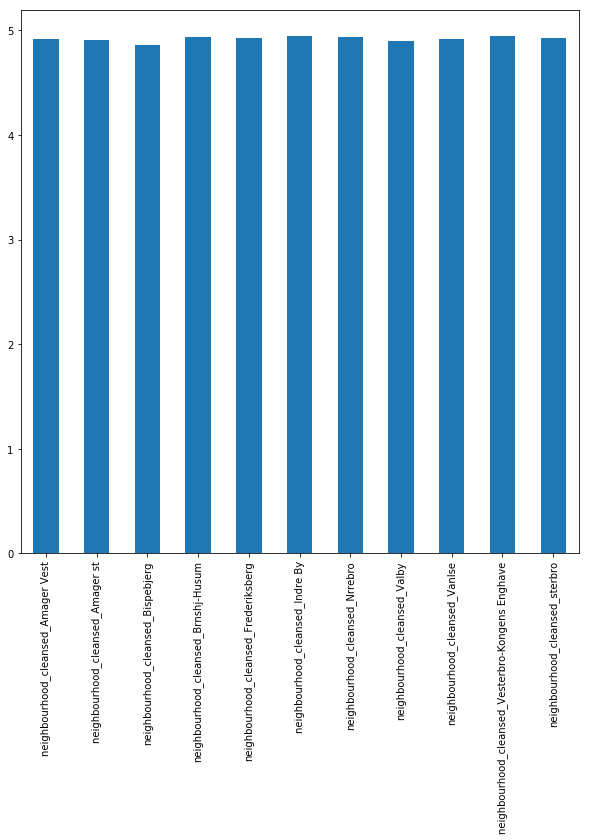

In [41]:
neighboorhood_averages.plot(kind='bar',figsize=(10,10))

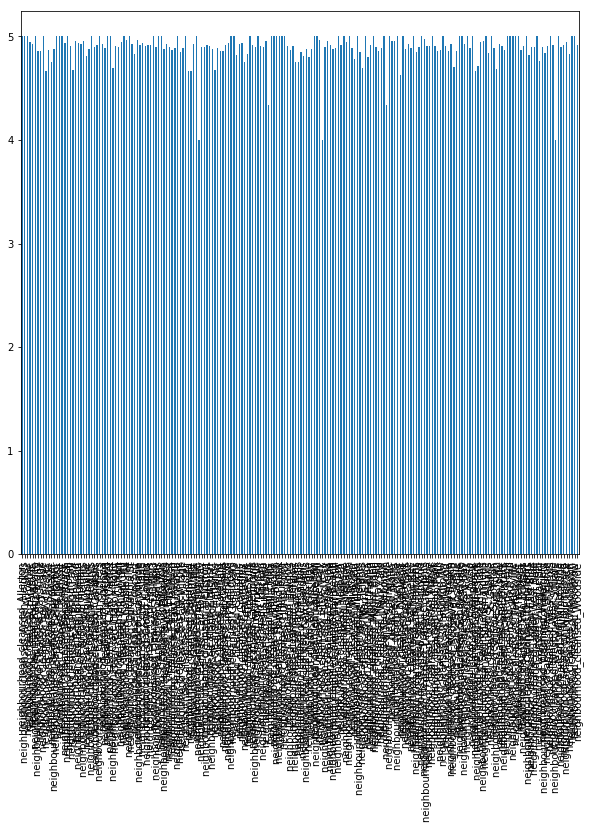

In [57]:
neighboorhood_averages_ny.plot(kind='bar',figsize=(10,10))

In [58]:
price_vs_rating_df = inputDF[['review_scores_rating', 'price']].copy()
correlation_features = inputDF[['price','review_scores_rating','accommodates','bathrooms','bedrooms','number_of_reviews']]

In [59]:
rating_over_price_df = price_vs_rating_df.groupby('review_scores_rating').mean()

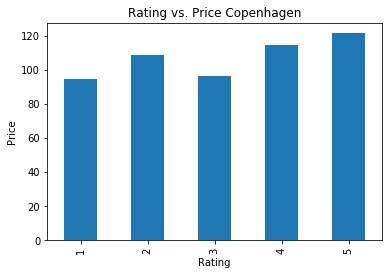

In [128]:
ax = rating_over_price_df.plot(kind='bar',legend=False,title='Rating vs. Price Copenhagen')
ax.set_xlabel('Rating')
ax.set_ylabel('Price')
plt.savefig('Rating_vs_Price_Copenhagen.pdf')

In [61]:
neighboorhood_vs_rating_df = inputDF[['neighbourhood_cleansed', 'review_scores_rating']].copy()

In [62]:
rating_over_neighboorhood_df = neighboorhood_vs_rating_df.groupby('neighbourhood_cleansed').mean()

In [63]:
rating_over_neighboorhood_df

,review_scores_rating
neighbourhood_cleansed,
Amager Vest,4.916793
Amager st,4.908015
Bispebjerg,4.860229
Brnshj-Husum,4.935345
Frederiksberg,4.925965
Indre By,4.948940
Nrrebro,4.934990
Valby,4.897569
Vanlse,4.914634


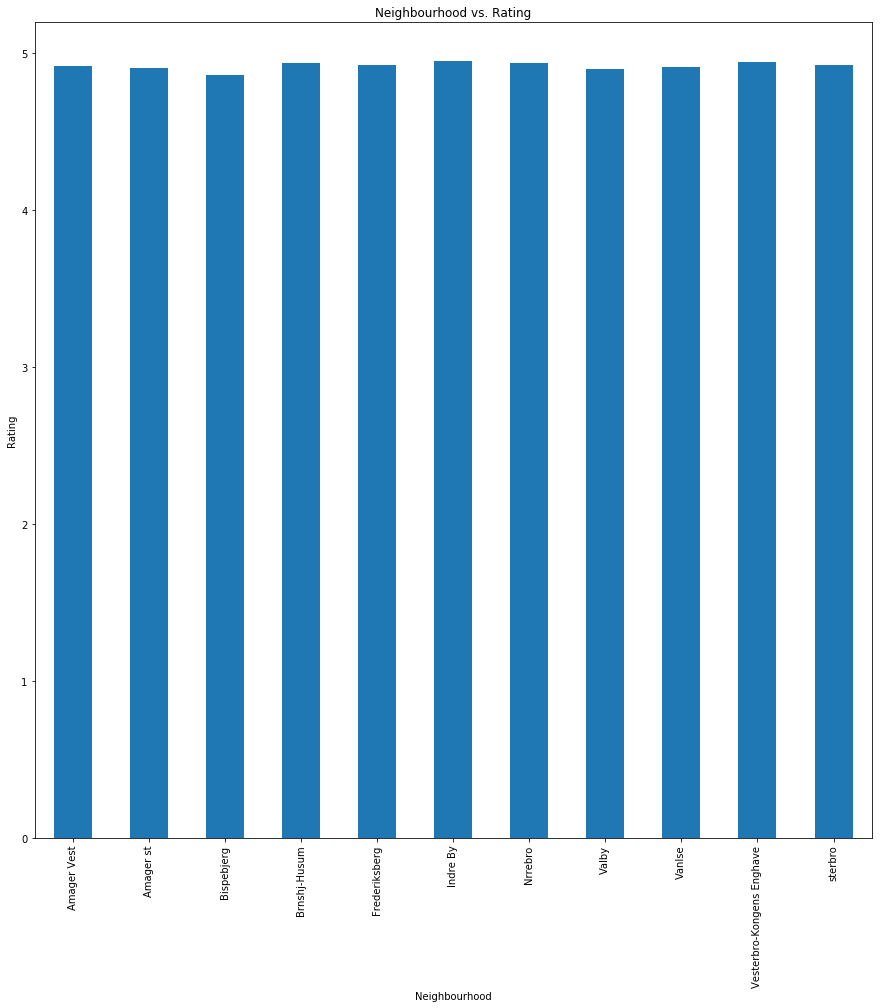

In [127]:
ax = rating_over_neighboorhood_df.plot(kind='bar',legend=False,title='Neighbourhood vs. Rating',figsize=(15,15))
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Rating')
plt.savefig('Neighbourhood_vs_rating_Copenhagen.pdf')

In [65]:
X = X_df.values
y = y_df.values # y has now shape (n,)
y = y.reshape(-1,1) # y has now shape (n,1)
####### COMPARE TO NEW CITY #########
X_ny = X_df_ny.values
y_ny = y_df_ny.values # y has now shape (n,)
y_ny = y_ny.reshape(-1,1) # y has now shape (n,1)

In [66]:
X_ny.shape

(30788, 254)

In [67]:
y_ny.shape

(30788, 1)

In [71]:
def randomize(a, b):
    # Generate the permutation index array.
    permutation = np.random.permutation(a.shape[0])
    # Shuffle the arrays by giving the permutation in the square brackets.
    shuffled_a = a[permutation]
    shuffled_b = a[permutation]
    return shuffled_a, shuffled_b

In [89]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

####### Shuffle the new data set ######
X_ny,y_ny = randomize(X,y)

# create training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_test_len = len(X_test)
y_test_len = len(y_test)

In [90]:
# fit a model
lm = linear_model.LinearRegression(fit_intercept=True)
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [96]:
test = (y_pred - y_test)**2
print y_pred.max()
print y_pred.min()
mse_array = []

5.31065161377
4.65196628395


In [97]:
# The mean squared error
print "Testing mean squared error: {}".format(mean_squared_error(y_test,y_pred))
# Explained variance score: 1 is perfect prediction
print 'Testing variance score: {}'.format(r2_score(y_test,y_pred))
mse_array.append(mean_squared_error(y_test,y_pred))

Testing mean squared error: 0.0879481309801
Testing variance score: 0.0230655953456


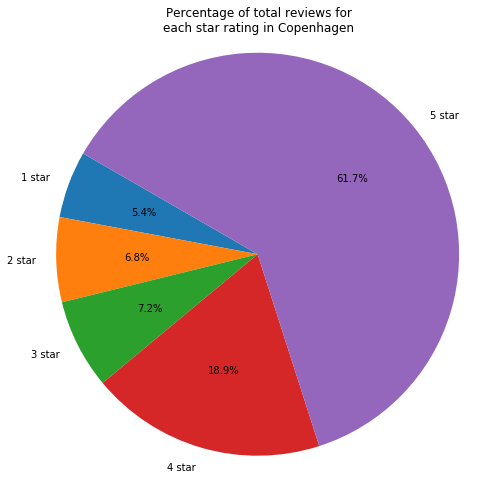

In [126]:
rating_review_count = inputDF[['number_of_reviews', 'review_scores_rating']].sort_values(by = 'review_scores_rating')
rating_revew_count = rating_review_count.groupby('review_scores_rating').mean()
#ax = rating_review_count.plot(kind
#                  figsize =(12,5),
#                  legend = False,
#                  title = 'Number of Reviews based on star rating')
#ax.set_xlim([0.5,5.5])
#ax.set_xlabel('Star ratings')
#ax.set_ylabel('Review count')


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = rating_revew_count.index
sizes = list(rating_revew_count.values)
labels = [str(item)+' '+'star' for item in labels]
    

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=150)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(8, 8)
ax1.set_title("Percentage of total reviews for\n\
each star rating in Copenhagen")
plt.savefig('Piechart_Copenhagen_reviews_rating.pdf')
plt.show()


In [99]:
rating_revew_count

,number_of_reviews
review_scores_rating,
1,1.230769
2,1.555556
3,1.647887
4,4.329609
5,14.130108


In [100]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

/Applications/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [101]:
# Perform 10-fold cross validation
scores = cross_val_score(lm, X, y, cv=10)
print 'Cross-validated scores:', scores

Cross-validated scores: [ 0.02581143  0.04854416 -0.00580852  0.0215636   0.01776246  0.02727681
  0.02213585  0.01719896  0.03401922  0.03465836]


In [102]:
predictions = cross_val_predict(lm, X, y, cv=10)
accuracy = metrics.r2_score(y, predictions)
print 'Cross-Predicted Accuracy:', accuracy

Cross-Predicted Accuracy: 0.0271142752979


In [103]:
#Ridge regression
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5,fit_intercept=True)
reg.fit (X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [104]:
y_pred = reg.predict(X=X_test)

In [105]:
ridge_mse = mean_squared_error(y_pred=y_pred,y_true=y_test)

In [106]:
# The mean squared error
print "Testing mean squared error ridge: {}".format(mean_squared_error(y_test,y_pred))
# Explained variance score: 1 is perfect prediction
print 'Testing variance score ridge: {}'.format(r2_score(y_test,y_pred))
mse_array.append(mean_squared_error(y_test,y_pred))

Testing mean squared error ridge: 0.087928405916
Testing variance score ridge: 0.0232847028299


In [107]:
#Lasso regression
reg_lasso = linear_model.Lasso(alpha = 0.1,fit_intercept=True)
reg_lasso.fit(X_train,y_train)
y_pred = reg_lasso.predict(X=X_test)
# The mean squared error
print "Testing mean squared error lasso: {}".format(mean_squared_error(y_test,y_pred))
# Explained variance score: 1 is perfect prediction
print 'Testing variance score lasso: {}'.format(r2_score(y_test,y_pred))
mse_array.append(mean_squared_error(y_test,y_pred))

Testing mean squared error lasso: 0.0889723595382
Testing variance score lasso: 0.0116883880591


In [108]:
from sklearn.svm import LinearSVR
svr = LinearSVR(C=0.01,fit_intercept=True)
svr.fit(X_train, y_train) 
y_pred = svr.predict(X_test)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
# The mean squared error
print "Testing mean squared error non linear SVR: {}".format(mean_squared_error(y_test,y_pred))
# Explained variance score: 1 is perfect prediction
print 'Testing variance score nonlinear SVR: {}'.format(r2_score(y_test,y_pred))
mse_array.append(mean_squared_error(y_test,y_pred))

Testing mean squared error non linear SVR: 0.0958631280118
Testing variance score nonlinear SVR: -0.0648547825732


In [110]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor( early_stopping=True,hidden_layer_sizes=(4,4,4),alpha=0.001)
nn.fit(X=X_train,y=y_train)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(4, 4, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [111]:
y_pred = nn.predict(X=X_test)
# The mean squared error
print "Testing mean squared error neural network: {}".format(mean_squared_error(y_test,y_pred))
# Explained variance score: 1 is perfect prediction
print 'Testing variance score neural network: {}'.format(r2_score(y_test,y_pred))
mse_array.append(mean_squared_error(y_test,y_pred))

Testing mean squared error neural network: 0.0912516497057
Testing variance score neural network: -0.0136301372811


In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


regr_forest = RandomForestRegressor(max_depth=5, random_state=0)
regr_forest.fit(X_train, y_train)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [113]:
y_pred = regr_forest.predict(X=X_test)
# The mean squared error
print "Testing mean squared error neural network: {}".format(mean_squared_error(y_test,y_pred))
# Explained variance score: 1 is perfect prediction
print 'Testing variance score neural network: {}'.format(r2_score(y_test,y_pred))
mse_array.append(mean_squared_error(y_test,y_pred))

Testing mean squared error neural network: 0.083914634353
Testing variance score neural network: 0.0678699769977


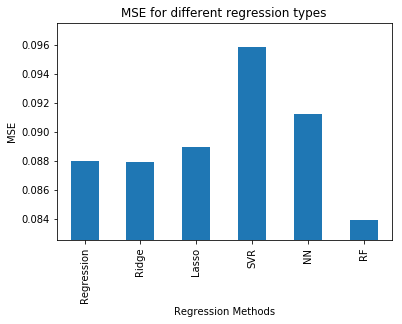

In [123]:
mse_labels = ['Regression','Ridge','Lasso','SVR','NN','RF']
performances = pd.Series(
    list(mse_array),
    index = mse_labels
)
ax1 = performances.plot(kind='bar')
plt.title("MSE for different regression types")
ax1.set_ylim([0.0825,0.0975])
plt.ylabel('MSE')
plt.xlabel('Regression Methods')
plt.savefig('Regression_Comparisons.pdf')
plt.show()